In [1]:
import seaborn as sb
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import scipy.stats as st
from scipy.stats import norm
import math 
sb.set()

import matplotlib as mpl
sb.set(rc = {'figure.figsize':(15,8)})
mpl.rcParams['figure.dpi'] = 300

### Auxillary Functions

In [2]:
#generates outcomes for dice and coins given a distribution

def dice(x): 
    if (x<=1/6):
        return 1
    elif (x>1/6 and x<=2/6):
        return 2
    elif (x>2/6 and x<=3/6):
        return 3
    elif (x>3/6 and x<=4/6):
        return 4
    elif (x>4/6 and x<=5/6):
        return 5
    elif (x>5/6 and x<1):
        return 6
    
def coin(x):
    if (x>0 and x<=1/2):
        return 0
    elif (x > 1/2):
        return 1

### 1. Simulation of idiosyncratic and systematic factors and estimation
#### Generating Uniform Distributions and Outcomes via Inverse Method

#### Question 1a)

In [3]:
SimData=pd.DataFrame() #creates empty dataframe
#creating columns in frame for each distribution
SimData['X1 Dist']= np.random.rand(1000) 
SimData['X2 Dist']= np.random.rand(1000)
SimData['C1 Dist']= np.random.rand(1000)
SimData['C2 Dist']= np.random.rand(1000)

#creating columns in frame with generated outcomes
SimData['X1']=SimData['X1 Dist'].apply(lambda x: dice(x))
SimData['X2']=SimData['X2 Dist'].apply(lambda x: dice(x))
SimData['C1']=SimData['C1 Dist'].apply(lambda x: coin(x))
SimData['C2']=SimData['C2 Dist'].apply(lambda x: coin(x))

#creating T and T tilda columns
SimData['T']=SimData['X1']+SimData['X2']+4*SimData['C1']+4*SimData['C2']
SimData['T_tilda']=SimData['X1']+SimData['X2']+8*SimData['C1']
SimData

,X1 Dist,X2 Dist,C1 Dist,C2 Dist,X1,X2,C1,C2,T,T_tilda
0,0.548032,0.716464,0.951318,0.908935,4,5,1,1,17,17
1,0.551323,0.600695,0.403530,0.095441,4,4,0,0,8,8
2,0.769577,0.040053,0.503703,0.669269,5,1,1,1,14,14
3,0.092899,0.777118,0.497268,0.578549,1,5,0,1,10,6
4,0.126774,0.507674,0.521355,0.173371,1,4,1,0,9,13
...,...,...,...,...,...,...,...,...,...,...
995,0.910216,0.034942,0.381918,0.768755,6,1,0,1,11,7
996,0.150599,0.415232,0.784315,0.589222,1,3,1,1,12,12
997,0.897717,0.721211,0.295452,0.195636,6,5,0,0,11,11
998,0.866278,0.318030,0.139630,0.225409,6,2,0,0,8,8


#### Question 1b)

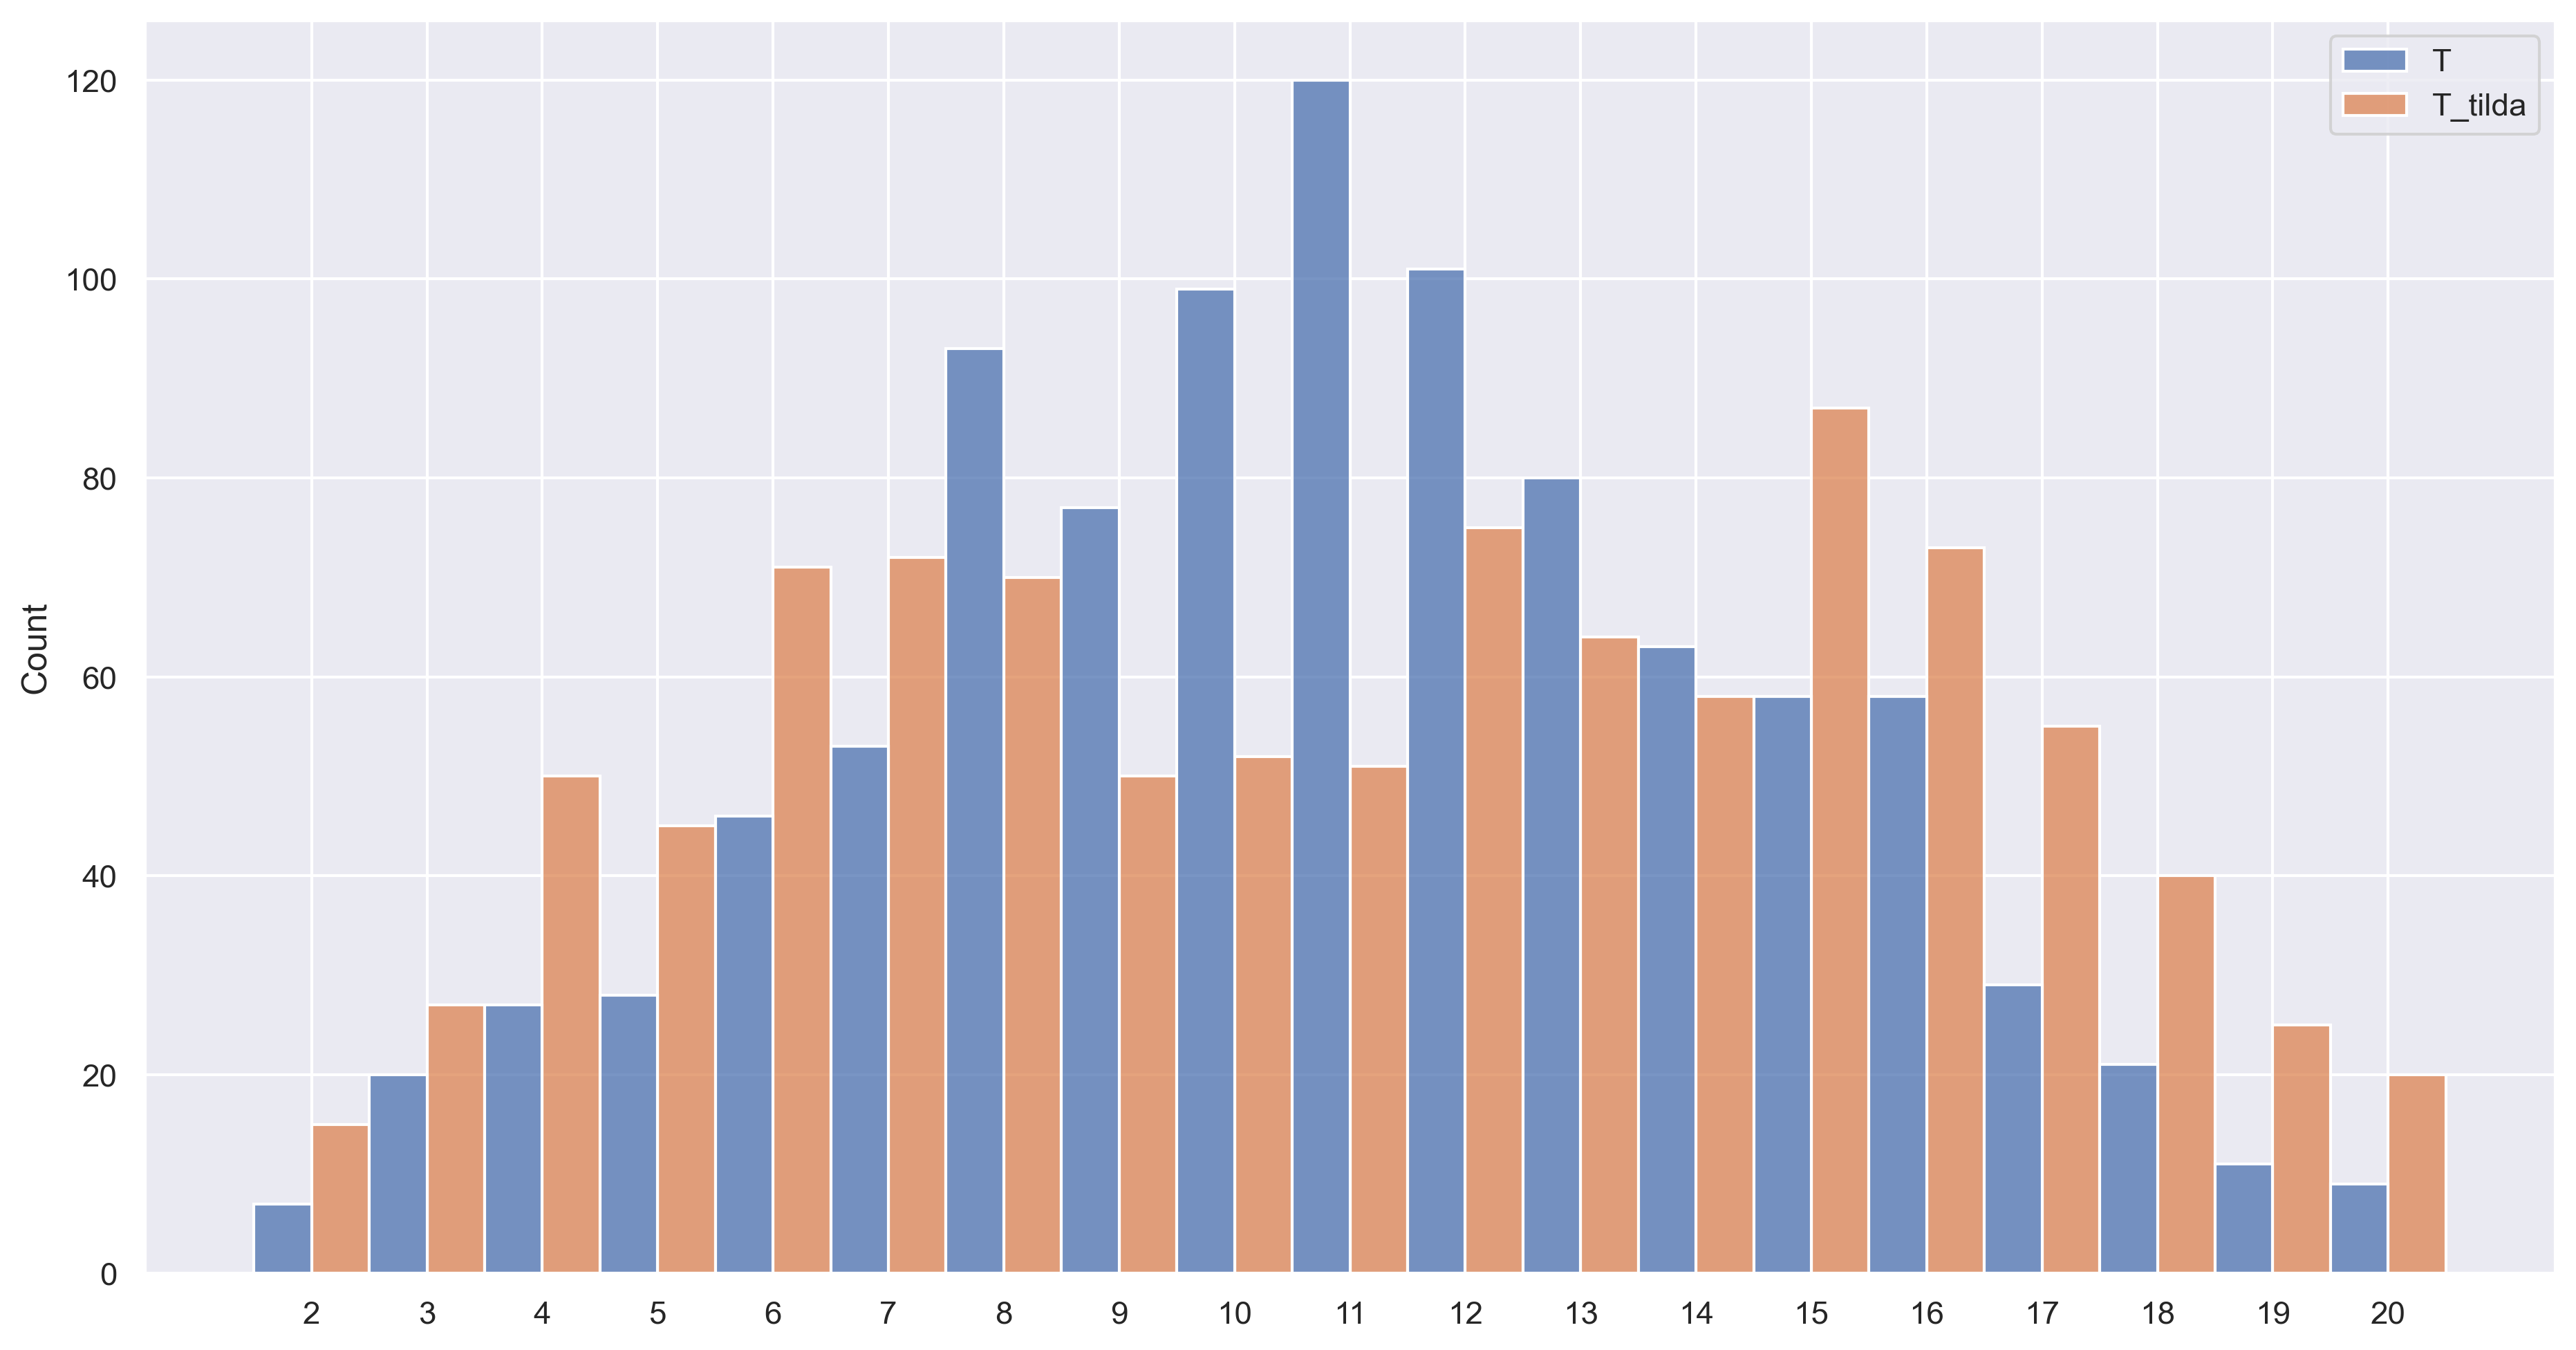

In [4]:
sb.histplot([SimData['T'],SimData['T_tilda']], multiple='dodge', discrete=True);
plt.xticks(list(range(2,21)));

#### Question 1c)

In [5]:
#creates DataFrame for results
Results=pd.DataFrame(index=['T', 'T_tilda'])
#generates columns with expected values, variances and CI for T and T_tilda
Results['Expected Value']=[SimData['T'].mean(), SimData['T_tilda'].mean()]
Results['Variance']= [SimData['T'].var(), SimData['T_tilda'].var()]
Results['CI']=(
    [st.norm.interval(alpha=0.95, loc=np.mean(SimData['T']), scale=st.sem(SimData['T'])),
     st.norm.interval(alpha=0.95, loc=np.mean(SimData['T_tilda']), scale=st.sem(SimData['T_tilda']))]
    )
Results['True Expected Value']= 11,11
Results['True Variance'] = 13.83,21.83
Results['CI'] = Results['CI'].apply(lambda x: np.round(x,3)) #rounding interval
Results.round(3) #rounding other entries

,Expected Value,Variance,CI,True Expected Value,True Variance
T,10.908,14.298,"[10.674, 11.142]",11,13.83
T_tilda,11.104,22.063,"[10.813, 11.395]",11,21.83


The simulated values of $\mathbb{E}[T]$, $\mathbb{E}$[$\widetilde{T}$], $Var(T)$, and $Var$($\widetilde{T}$) are all very close to the true values computed in the first assignment 

#### Question 1d)


In [6]:
#creating temporary dataframes
temp=pd.DataFrame()
K=[]
#this loop resamples the distributions, computes the desired probability and adds that value to a list K
for n in range(1,100):
    temp['X1 Dist']= np.random.rand(1000) 
    temp['X2 Dist']= np.random.rand(1000)
    temp['C1 Dist']= np.random.rand(1000)
    temp['C2 Dist']= np.random.rand(1000)
    temp['X1']=temp['X1 Dist'].apply(lambda x: dice(x))
    temp['X2']=temp['X2 Dist'].apply(lambda x: dice(x))
    temp['C1']=temp['C1 Dist'].apply(lambda x: coin(x))
    temp['C2']=temp['C2 Dist'].apply(lambda x: coin(x))
    temp['T']=temp['X1']+temp['X2']+4*temp['C1']+4*temp['C2']
    
    K.append(len(temp.query("T >= 16"))/(len(temp)))
    
#this function, then estimates the 95% CI for the list of probabilities
CI = st.norm.interval(alpha=0.95, loc=np.mean(K), scale=st.sem(K))


The probability that $P(T\geq16) = 0.119$ with confidence interval $ [0.116,0.121]$. This value is extremly close to the true value of $P(T\geq16)$ which is 0.118.

#### Question 1e)

[Explanation of .query()]: .query() filters every row such that the expression inside of it is true. In this case, the query function iterates over each value in column 'a' and returns a dataframe who's rows satisfy the condition.
len() function takes the length of this dataframe which is equivalent to count of the outcomes. Thus,
len(SimData.query("T_tilda > @x")) returns the amount of outcomes such that the expression is true.
P.s @x just lets query know that x is a variable


Prob=pd.DataFrame()
Prob['a']=sorted(SimData['T'].unique())
Prob['T > a']=Prob['a'].apply(lambda x:len(SimData.query("T > @x"))/len(SimData))
Prob['T_tilda > a']=Prob['a'].apply(lambda x:len(SimData.query("T_tilda > @x"))/len(SimData))
Prob.set_index('a')
#print("The values satisfying a and a tilda is less than 0.03 are 18 and 19, respectively")

The estimated values of $a$ and $\widetilde{a}$ are the same as their true value of 18 and 19, respectively.

#### Question 1f)

The estimated value of $\mathbb{E}[T\geq16] = 17.11$. This is very close to its true of 17.176

In [7]:
#print("The expected value of T given that T is greater than or equal to 16 is "+ 
      #str(round(SimData.query("T >= 16")['T'].mean(),2)))

### 2. Evaluating Options Hedging Strategies

In [8]:
#importing BNS dataset
Data=pd.read_excel("BNSweekly.xlsx", index='Date')
Data['BNS_Log_Ret']=np.log(Data['BNS']/Data['BNS'].shift(1))
Data.round(3)

,Date,BNS,BNS_Log_Ret
0,2017-10-02,62.042,NaN
1,2017-10-09,62.783,0.012
2,2017-10-16,62.970,0.003
3,2017-10-23,64.456,0.023
4,2017-10-30,65.070,0.009
...,...,...,...
252,2022-08-01,77.240,0.006
253,2022-08-08,79.130,0.024
254,2022-08-15,79.966,0.011
255,2022-08-22,73.627,-0.083


### Assigning variables 

In [9]:
#given constants
S_0=67.45
r=0.03
T=11/52
#calculated constants
mu=round((Data['BNS_Log_Ret'].mean() + Data['BNS_Log_Ret'].var()/2)*52,3) #annualized weekly data
sig=round(Data['BNS_Log_Ret'].std()*np.sqrt(52),3) #annualized weekly data
Data['BNS'].mean()
#Data['BNS'].std()

64.81544764202336

#### Question 2a)

In [10]:
print("The annualized mean and variance of the BNS price are "+str(mu)+" and "+str(sig)+", respectively.")

The annualized mean and variance of the BNS price are 0.045 and 0.2, respectively.


### Question 2b)
None of the collars are zero cost collars because no pair of calls and puts have the same price. 

#### Question 2c)

In [11]:
Port=pd.DataFrame(index=['PA','PB', 'PC', 'PD'])
PA_0, PB_0, PC_0, PD_0 = 10000*S_0,10000*(S_0 + 1.24),10000*(S_0 + 1.24-1.56),10000*(S_0-0.26+3.65)
Port['Cost']=[PA_0, PB_0, PC_0, PD_0]
Port

,Cost
PA,674500.0
PB,686900.0
PC,671300.0
PD,708400.0


### Question 2d)

$$ 
\text{Profit(PA)} = 10000S_T - PAe^{rT} \\\\
\text{Profit(PB)} = 10000(S_T + \max\{64-S_T,0\}) - PBe^{rt} \\\\
\text{Profit(PC)} = 10000(S_T + \max\{64-S_T,0\} - \max\{S_T-70,0\}) - PCe^{rt} \\\\
\text{Profit(PD)} = 10000(S_T + \max\{70-S_T,0\} - \max\{S_T-76,0\}) - PDe^{rt} \\
$$

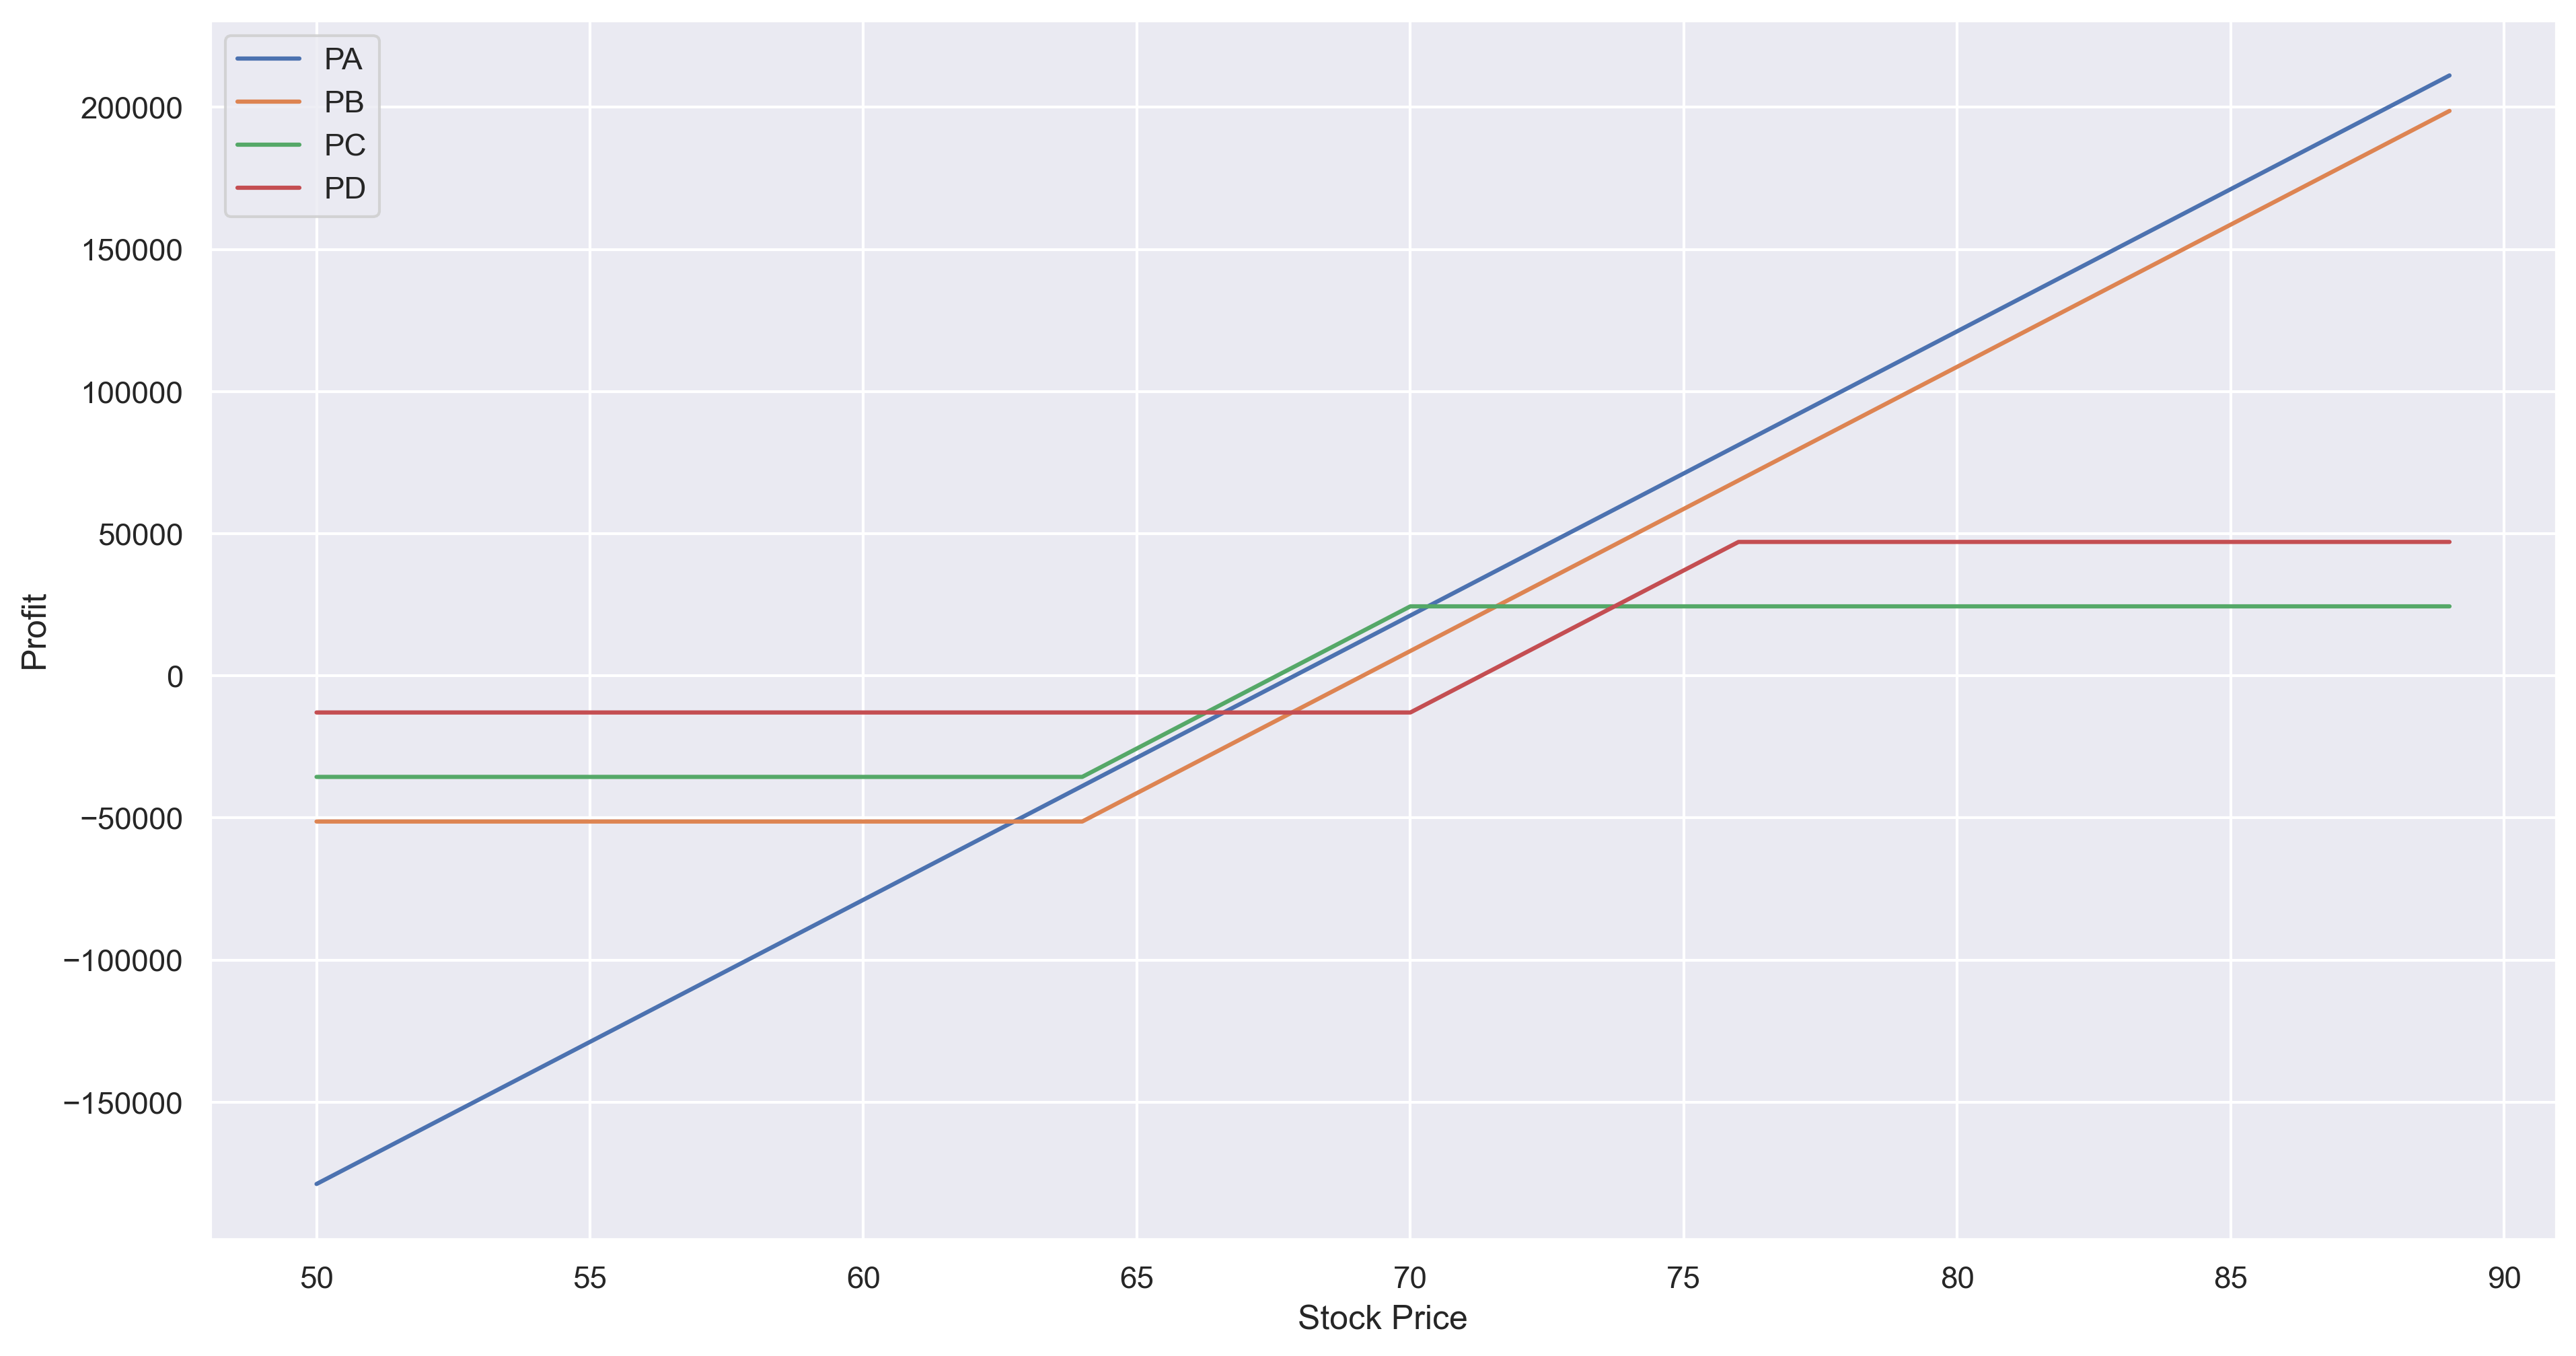

In [12]:
#generating profit dataframes
Profit=pd.DataFrame()
Profit['S_t']=np.arange(50,90,1)
Profit['PA'], Profit['PB'], Profit['PC'], Profit['PD']=(
    Profit['S_t'].apply(lambda x:10000*x - PA_0*np.exp(r*T)),
    Profit['S_t'].apply(lambda x:10000*(x + max(64-x,0))-PB_0*np.exp(r*T)),
    Profit['S_t'].apply(lambda x:10000*(x + max(64-x,0)-max(x-70,0))-PC_0*np.exp(r*T)),
    Profit['S_t'].apply(lambda x:10000*(x + max(70-x,0)-max(x-76,0))-PD_0*np.exp(r*T))
                                                    )
Profit.plot(x='S_t');
plt.ylabel('Profit');
plt.xlabel('Stock Price');

In [19]:
Sim['S_T'].pct_change().mean()

0.00878421679548338

### Question 2e)

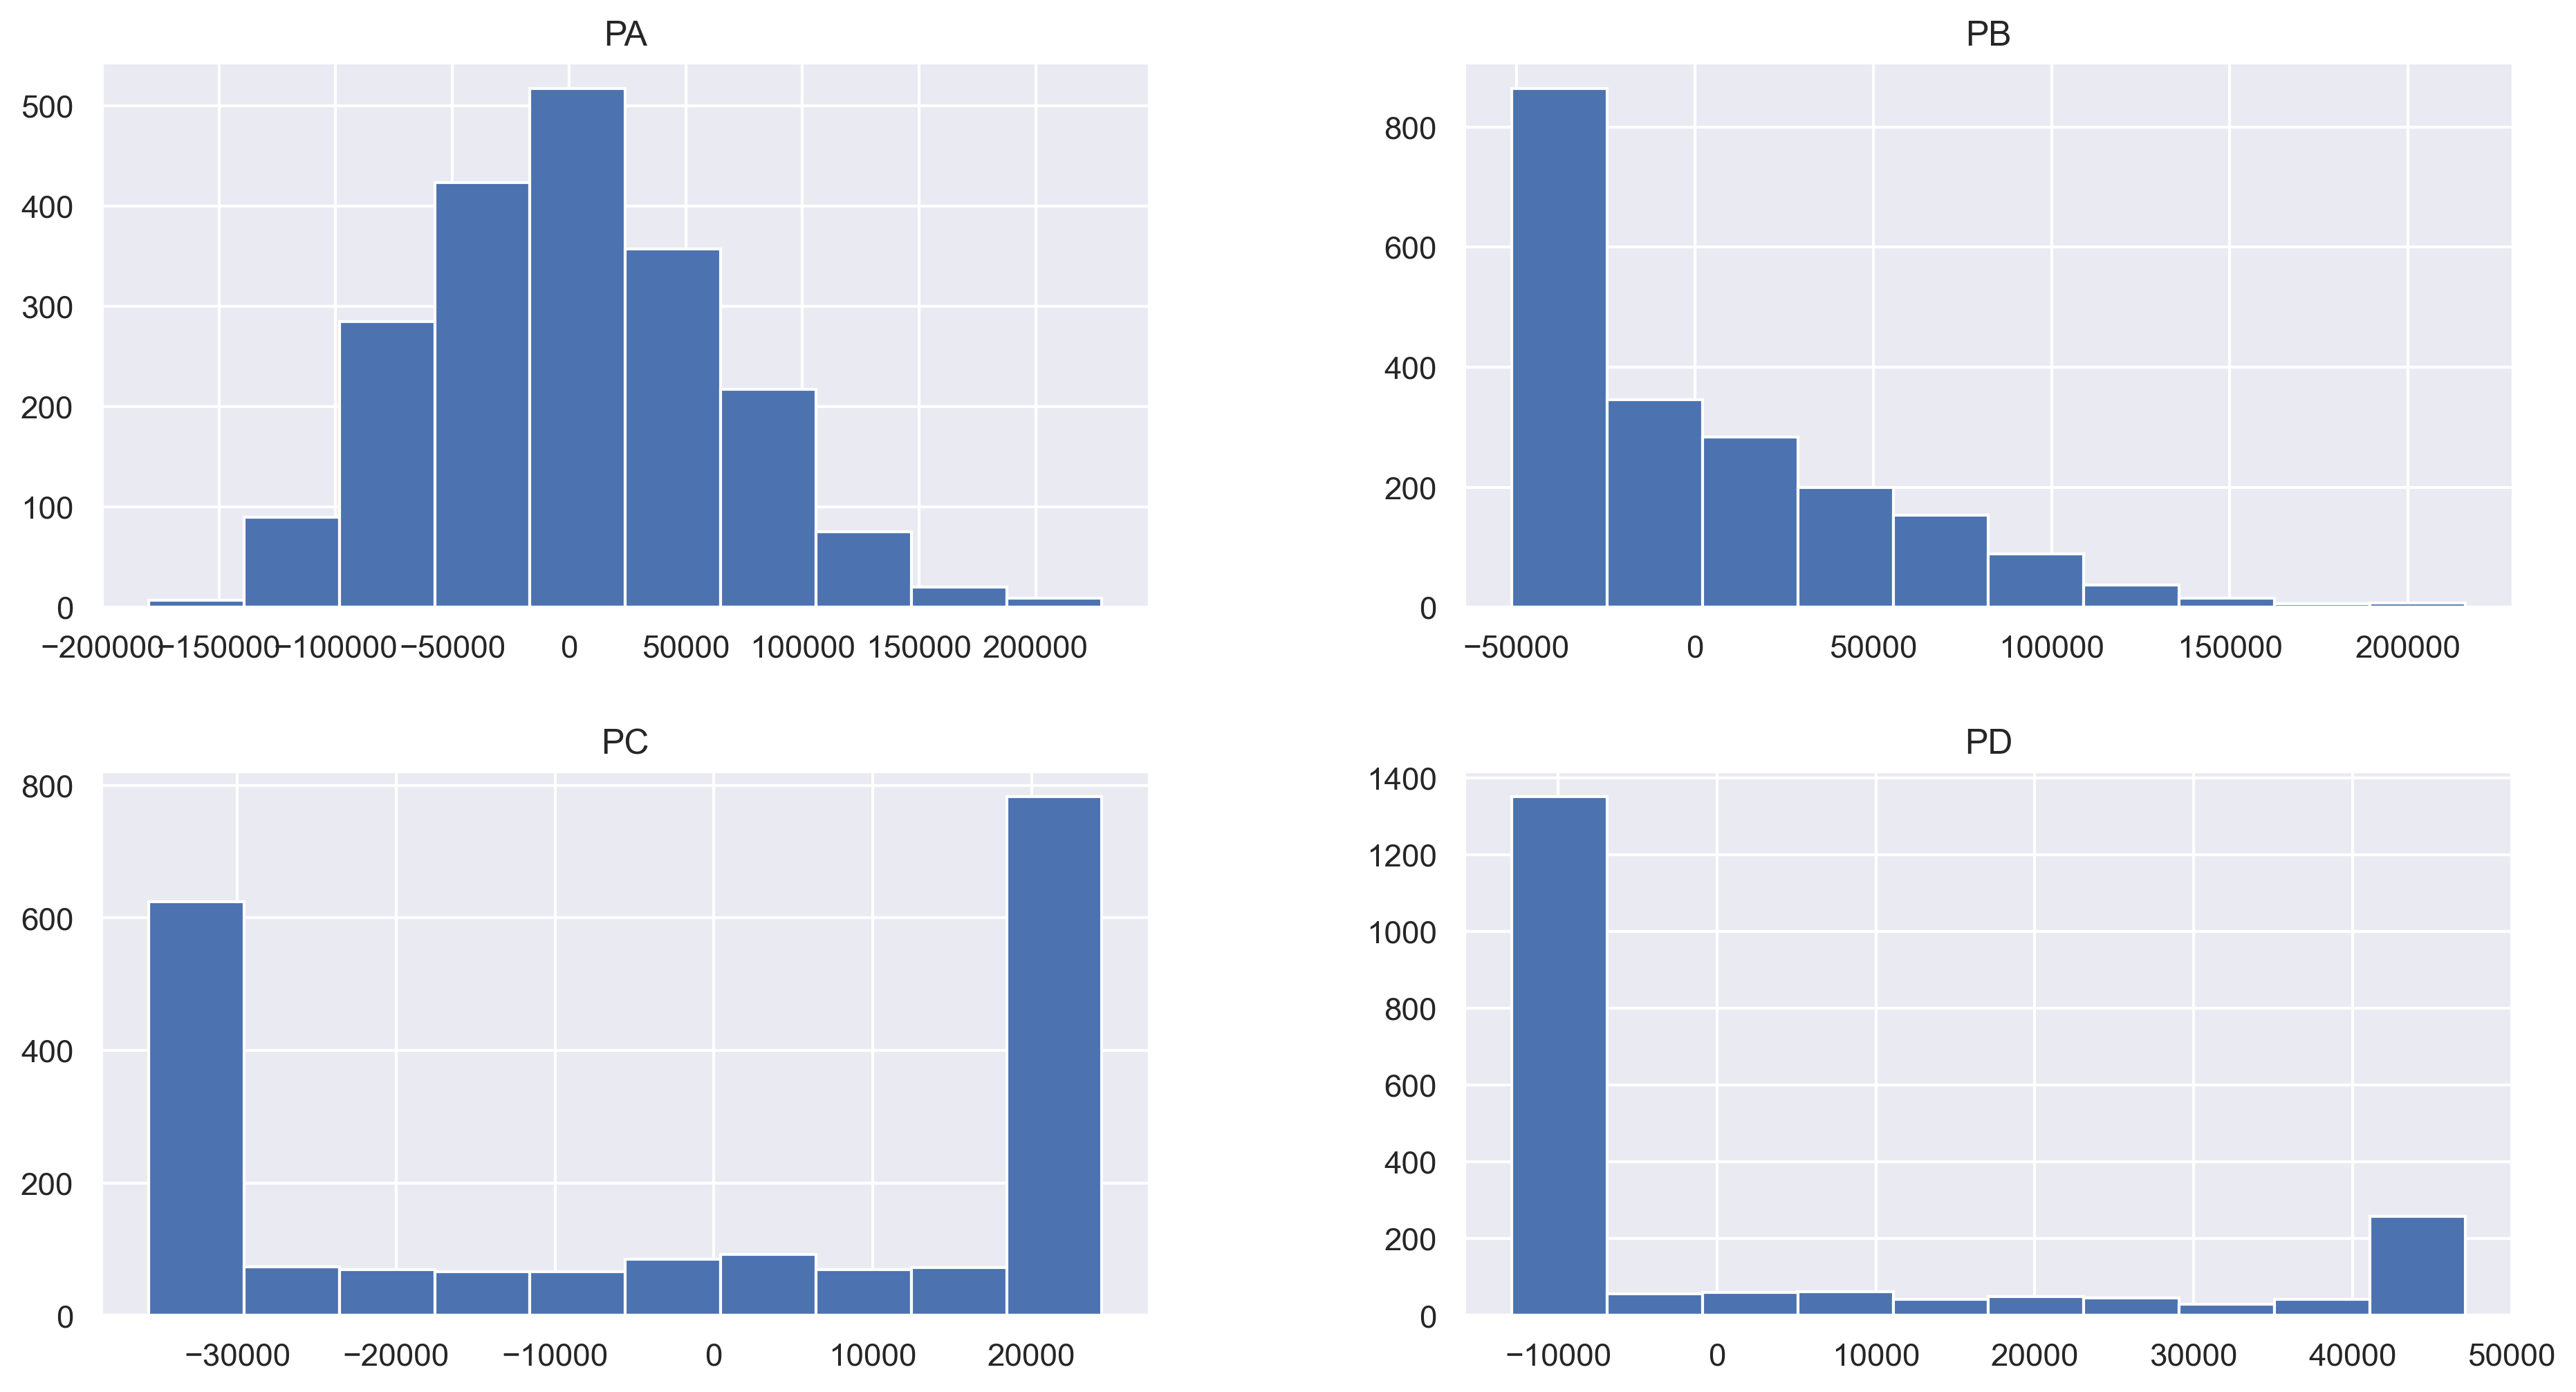

In [13]:
#generating simulated stock prices 
Sim=pd.DataFrame()
Sim['U']=np.random.rand(2000)
Sim['Z']=Sim['U'].apply(lambda x:norm.ppf(x))
Sim['X_T']= (mu-(sig**2)/2)*T + sig*np.sqrt(T)*Sim['Z']
Sim['S_T']=S_0*np.exp(Sim['X_T'])
Sim['PA']=10000*Sim['S_T'] - PA_0*np.exp(r*T)
Sim['PB']=Sim['S_T'].apply(lambda x:10000*(x + max(64-x,0))-PB_0*np.exp(r*T))
Sim['PC']=Sim['S_T'].apply(lambda x:10000*(x + max(64-x,0)-max(x-70,0))-PC_0*np.exp(r*T))
Sim['PD']=Sim['S_T'].apply(lambda x:10000*(x + max(70-x,0)-max(x-76,0))-PD_0*np.exp(r*T))
Sim.hist(['PA','PB','PC', 'PD']);

In [14]:
Sim['PA_Ret'] = Sim['PA'].div(PA_0*np.exp(r*T))
Sim['PB_Ret'] = Sim['PB'].div(PB_0*np.exp(r*T))
Sim['PC_Ret'] = Sim['PC'].div(PC_0*np.exp(r*T))
Sim['PD_Ret'] = Sim['PD'].div(PD_0*np.exp(r*T))

In [15]:
Stats=pd.DataFrame(index=('PA', 'PB', 'PC', 'PD'))

Stats['Expected Return']=[Sim['PA_Ret'].mean()*(52/11), 
               Sim['PB_Ret'].mean()*(52/11), 
               Sim['PC_Ret'].mean()*(52/11), 
               Sim['PD_Ret'].mean()*(52/11)]

Stats['Standard Deviation']=[
               Sim['PA_Ret'].std()*np.sqrt(52/11), 
               Sim['PB_Ret'].std()*np.sqrt(52/11), 
               Sim['PC_Ret'].std()*np.sqrt(52/11), 
               Sim['PD_Ret'].std()*np.sqrt(52/11)
                ]
Stats['Risk Adjusted Return'] = (Stats['Expected Return']-r)/Stats['Standard Deviation']
Stats.round(3)

,Expected Return,Standard Deviation,Risk Adjusted Return
PA,0.006,0.202,-0.119
PB,-0.013,0.160,-0.270
PC,-0.021,0.083,-0.614
PD,0.002,0.066,-0.423


### Questio 1f)

Based on the above analysis, I would hedge 100 collars with collar width of 6 and strike price of $70. I prefer portfolio strategy PA, because although it has a high standard deviation, it also has better returns and the largest risk adjusted returns. I am comfortable risking it all. 

In [20]:
norm.ppf(0.95)

1.6448536269514722

In [21]:
norm.ppf(0.975)

1.959963984540054